# Exercise 1b IFML WS21
Team: Philipp Göldner, Oskar Weinfurtner

# 3. kNN Classification on Real Data
## 3.1 Exploring the Data

In [1]:
from sklearn . datasets import load_digits
digits = load_digits ()
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits["target_names"]

print(data.dtype)
print(data.shape)
print(images.shape)

float64
(1797, 64)
(1797, 8, 8)


<span style="color:green;font-weight:bold">You could have also shown the shape of "data".</span>

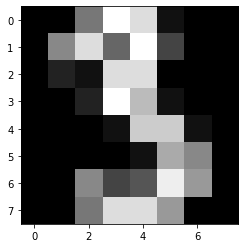

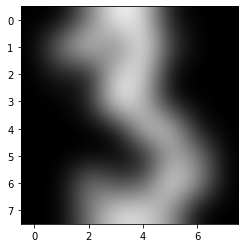

In [2]:
import numpy as np
import matplotlib.pyplot as plt
threes = np.argwhere(target==3)
img = images[threes[0]][0]
assert 2 == len(img.shape)
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.show()
plt.figure()
plt.gray()
plt.imshow(img, interpolation="bicubic")
plt.show()

<span style="color:green;font-weight:bold"> Could have been better to put both images side-by-side. </span>

In [ ]:
<span style="color:green;font-weight:bold"> </span>

In [3]:
from sklearn import model_selection
X_all = data
Y_all = target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, Y_all, test_size= 0.4, random_state=0)

<span style="color:green;font-weight:bold"> It would be more readible to include all the imports at the beginning of the document, but of course that's not a big issue. </span>

In [4]:
X_train.shape

(1078, 64)

<span style="color:green;font-weight:bold"> General comment for 3.1: Apart from minor readability issues, this part is equivalent to the sample solution.</span>

## 3.2 Distance function computation using loops

In [5]:
def dist_loop(training, test):
    dist = np.zeros((training.shape[0],test.shape[0]))
    for i,n in enumerate(training):
        for j,m in enumerate(test):
            dist[i][j] = np.linalg.norm(n-m)
    return dist

<span style="color:green;font-weight:bold"> General comment for 3.2: This part works even faster than the sample solution, since you used the already defined "np.linalg.norm". </span>

$d(x, y) = \sqrt{\sum_i(x_i - y_i)^2} = \sqrt{\sum_i{x_i^2 - 2x_iy_i + y_i^2}} = \sqrt{\sum_i{x_i^2} + \sum_i{y_i^2} - \sum_i{2x_iy_i}}$

## 3.3 Distance function computation using vectorization

In [6]:
def dist_vec(training, test):
    #training = training[0:3]
    #test = test[0:3]
    #first square and sum
    training_sum_square = np.sum(training**2, axis=1)
    test_sum_square = np.sum(test**2, axis=1)
    #https://numpy.org/doc/stable/reference/generated/numpy.ufunc.outer.html
    # Add both together in the right way
    square_sum = np.add.outer(training_sum_square, test_sum_square)
    sum_prod_train_test = np.dot(training, test.T)
    dist = np.sqrt(square_sum - 2*sum_prod_train_test)
    return dist

In [7]:
%timeit dist_vec(X_train, X_test)

6.97 ms ± 75.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit dist_loop(X_train, X_test)

4.83 s ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<span style="color:green;font-weight:bold"> General comment for 3.3: Fine, but a little slower than the sample code (I multiply the here given time by 100 since you have 100 loops in 1 run, while that's 1 loop in 1 run in the sample solution).  </span>

as we ca see, the vectorized implementation runs faster by an order of magnitude.

## 3.4 Implement the k-nearest neighbor classifier

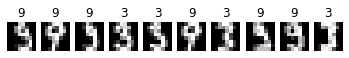

In [73]:
# filter digit 3 and 9 from training and test set
idx = np.argwhere((target==3) | (target==9))

n_plots=10
f, AX = plt.subplots(1, n_plots)
for i, j in enumerate(np.random.choice(100, size=[n_plots])):
    im, label = images[idx[j]][0], target[idx[j]][0]
    AX[i].imshow(im, cmap='gray')
    AX[i].axis('off')
    AX[i].set_title(label)

In [74]:
X_all = data[idx]
Y_all = target[idx]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_all.squeeze(), Y_all.squeeze(), test_size= 0.4, random_state=0)
X_train.shape

(217, 64)

In [144]:
from collections import Counter

# kNN combining our own and official solution for sheet 1a
def knn_classifier(x_test, x_train, y_train, k):
    """
    Nearest neighbor classifier for arbitrary training set size.
    
    params
    ------
    x_test : array of examples to classify
    x_train : feature data
    y_train : label data
    
    returns
    -------
    labels: predicted labels of x_test sample array
    """

    np.expand_dims(x_train, axis=0)
    np.expand_dims(x_test, axis=0)
    
    diffs = dist_vec(x_train, x_test)
    labels = np.asarray([Counter(y_train[np.argpartition(diff, k)[:k]]).most_common(1)[0][0] for diff in diffs.T])
    
    # Explanation:
    # np.argpartition(diff, k)[:k] finds the indices of the k smallest differences in diff
    # Counter(y_train[...]).most_common(1) performs a majority voting in the labels of nearest neighbors 
    
    return labels

# quick test
predictions = knn_classifier(X_test, X_train, y_train, k=1)
error_rate = np.count_nonzero(predictions != y_test) / len(y_test)
#print(y_test)
#print(predictions)
print(error_rate)

0.00684931506849315


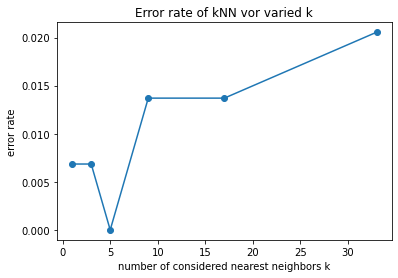

In [142]:
# vary value for k and compute error rates, describe classification performance
ks = [1,3,5,9,17,33]
error_rates = []
for k in ks: 
    # predict using kNN classifier
    predictions = knn_classifier(X_test, X_train, y_train, k=k)
    
    # determine error rate on test set
    error_rates.append(np.count_nonzero(predictions != y_test) / len(y_test))

plt.plot(ks, error_rates, marker='o')
plt.xlabel('number of considered nearest neighbors k')
plt.ylabel('error rate')
plt.title('Error rate of kNN vor varied k')
plt.show()

the classification performance is best for k=5, where we achieve the lowest classification error, for larger and smaller values of k, the error is increases

<span style="color:green;font-weight:bold"> General comment for 3.4: Fine. Some differences in the results between this and the sample solution can be explained by the randomness of the training and test sets.</span>

## 4. Cross Validation

In [163]:
# write a function
#X_folds, y_folds = split_folds(data, target, L)

def split_folds(data, target, L):    
    assert len(data) == len(target)
    p = np.random.permutation(len(data))    
    return np.array_split(data[p], L), np.array_split(target[p], L)

In [164]:
# test the function
split_folds(np.asarray([[1,2], [3,4], [5,6]]), np.asarray([1,2,3]), 2)

([array([[5, 6],
         [3, 4]]),
  array([[1, 2]])],
 [array([3, 2]), array([1])])

In [167]:
# test sklearn kNN
from sklearn.neighbors import KNeighborsClassifier
sk_kNN = KNeighborsClassifier(n_neighbors=3)
sk_kNN.fit(X_train, y_train)
prediction = sk_kNN.predict(X_test)
error_rate = np.count_nonzero(predictions != y_test) / len(y_test)
error_rate

0.00684931506849315

In [246]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) # error source tbd

Ls = [2,5,10]
ks = [1,5]

err_mean_our = []
err_std_our = []

err_mean_skl = []
err_std_skl = []

for L in Ls:
    for k in ks:
        print('L:', L, 'k:', k)
        X_folds, y_folds = split_folds(data, target, L)
        
        error_fold = []
        error_fold_sk = []
        
        for f in range(len(X_folds)):
            X_test = X_folds[f]
            y_test = y_folds[f]
            
            X_train = np.concatenate(np.delete(X_folds, f, axis=0))
            y_train = np.concatenate(np.delete(y_folds, f, axis=0))
            
            # custom kNN
            predictions = np.asarray(knn_classifier(X_test, X_train, y_train, k=k))
            error_fold.append(np.count_nonzero(predictions != y_test) / float(len(y_test)))
            
            # sklearn kNN
            sk_kNN = KNeighborsClassifier(n_neighbors=k)
            sk_kNN.fit(X_train, y_train)
            predictions = np.asarray(sk_kNN.predict(X_test))
            error_fold_sk.append(np.count_nonzero(predictions != y_test) / len(y_test))
    
        error_fold = np.asarray(error_fold)
        error_fold_sk = np.asarray(error_fold_sk)

        err_mean_our.append(np.mean(error_fold))
        err_std_our.append(np.std(error_fold))
        err_mean_skl.append(np.mean(error_fold_sk))
        err_std_skl.append(np.std(error_fold_sk))
        
        print('our kNN: mean error_rate', np.mean(error_fold), '+/-', np.std(error_fold))
        print('skl kNN: mean error_rate', np.mean(error_fold_sk), '+/-', np.std(error_fold_sk))

L: 2 k: 1
our kNN: mean error_rate 0.014466705148754741 +/- 0.003330847687730242
skl kNN: mean error_rate 0.014466705148754741 +/- 0.003330847687730242
L: 2 k: 5
our kNN: mean error_rate 0.0211469809315473 +/- 0.0011247339905016956
skl kNN: mean error_rate 0.02003401453235592 +/- 0.001124114643590626
L: 5 k: 1
our kNN: mean error_rate 0.01168368926029093 +/- 0.0027134669276974274
skl kNN: mean error_rate 0.01168368926029093 +/- 0.0027134669276974274
L: 5 k: 5
our kNN: mean error_rate 0.013910554008047044 +/- 0.006339771252498315
skl kNN: mean error_rate 0.013353450943980192 +/- 0.007122225977292642
L: 10 k: 1
our kNN: mean error_rate 0.011691495965238982 +/- 0.005258323042441389
skl kNN: mean error_rate 0.011691495965238982 +/- 0.005258323042441389
L: 10 k: 5
our kNN: mean error_rate 0.013913718187461201 +/- 0.009713114912511525
skl kNN: mean error_rate 0.013913718187461201 +/- 0.009713114912511525


The comparsion with the SkLearn Implementation shows only slight differences, most of the digits are the same. For better visual comparsison, we plot the results: 

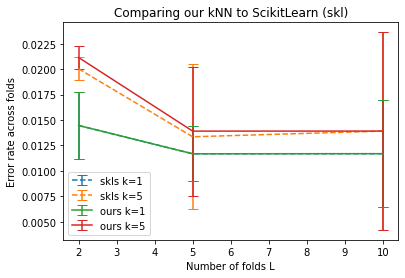

In [272]:
plt.title('Comparing our kNN to ScikitLearn (skl)')
plt.xlabel('Number of folds L')
plt.ylabel('Error rate across folds')
plt.errorbar(Ls, err_mean_skl[0::2], err_std_skl[0::2], label='skls k=1', linestyle='--', color='C0', capsize=5)
plt.errorbar(Ls, err_mean_skl[1::2], err_std_skl[1::2], label='skls k=5', linestyle='--', color='C1', capsize=5)
plt.errorbar(Ls, err_mean_our[0::2], err_std_our[0::2], label='ours k=1', color='C2', capsize=5)
plt.errorbar(Ls, err_mean_our[1::2], err_std_our[1::2], label='ours k=5', color='C3', capsize=5)
plt.legend(loc='best')
plt.show()

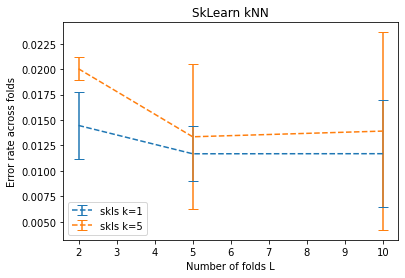

In [271]:
plt.title('SkLearn kNN')
plt.xlabel('Number of folds L')
plt.ylabel('Error rate across folds')
plt.errorbar(Ls, err_mean_skl[0::2], err_std_skl[0::2], label='skls k=1', linestyle='--', color='C0', capsize=5)
plt.errorbar(Ls, err_mean_skl[1::2], err_std_skl[1::2], label='skls k=5', linestyle='--', color='C1', capsize=5)
plt.legend(loc='best')
plt.show()

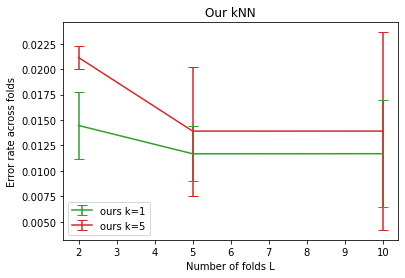

In [270]:
plt.title('Our kNN')
plt.xlabel('Number of folds L')
plt.ylabel('Error rate across folds')
plt.errorbar(Ls, err_mean_our[0::2], err_std_our[0::2], label='ours k=1', color='C2', capsize=5)
plt.errorbar(Ls, err_mean_our[1::2], err_std_our[1::2], label='ours k=5', color='C3', capsize=5)
plt.legend(loc='best')
plt.show()

From the plots we can observe, that a higher number of folds decreases the mean error across the folds, but too many folds are not useful, as the mean error does not decrease anymore, instead the standard deviation gets larger.

<span style="color:green;font-weight:bold"> General comment for 4: Fine. The same comment one more time: You can make your document much more readible by plotting the diagrams side-by-side. In total, good work!</span>